In [1]:
import scanpy as sc
# Read 10x dataset
adata = sc.read_10x_h5("neuron_10k_v3_filtered_feature_bc_matrix.h5")
# Make variable names (in this case the genes) unique
adata.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [2]:
PCA = sc.tl.pca(adata)

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'feature_types' as categorical
... storing 'genome' as categorical


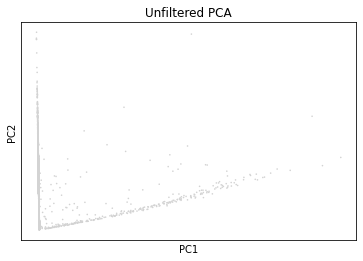

In [3]:
sc.pl.pca(adata, title = 'Unfiltered PCA')

# Now to filter the data

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


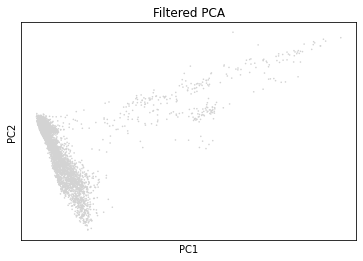

In [4]:
sc.pp.recipe_zheng17(adata)
sc.tl.pca(adata)
sc.pl.pca(adata,title = 'Filtered PCA')

In [5]:
sc.pp.neighbors(adata)
sc.tl.leiden(adata)

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


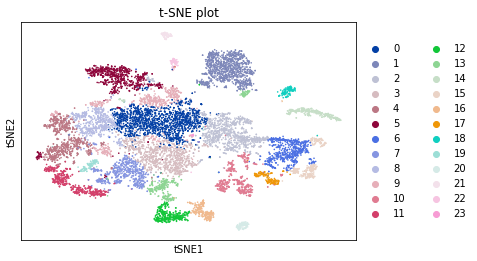

In [6]:
sc.tl.tsne(adata)
sc.pl.tsne(adata, color = 'leiden', title = 't-SNE plot')

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


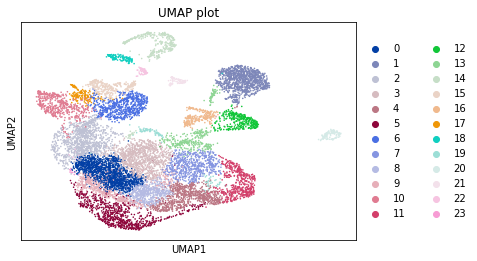

In [7]:
sc.tl.umap(adata)
sc.pl.umap(adata, color = 'leiden', title = 'UMAP plot')

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:408: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


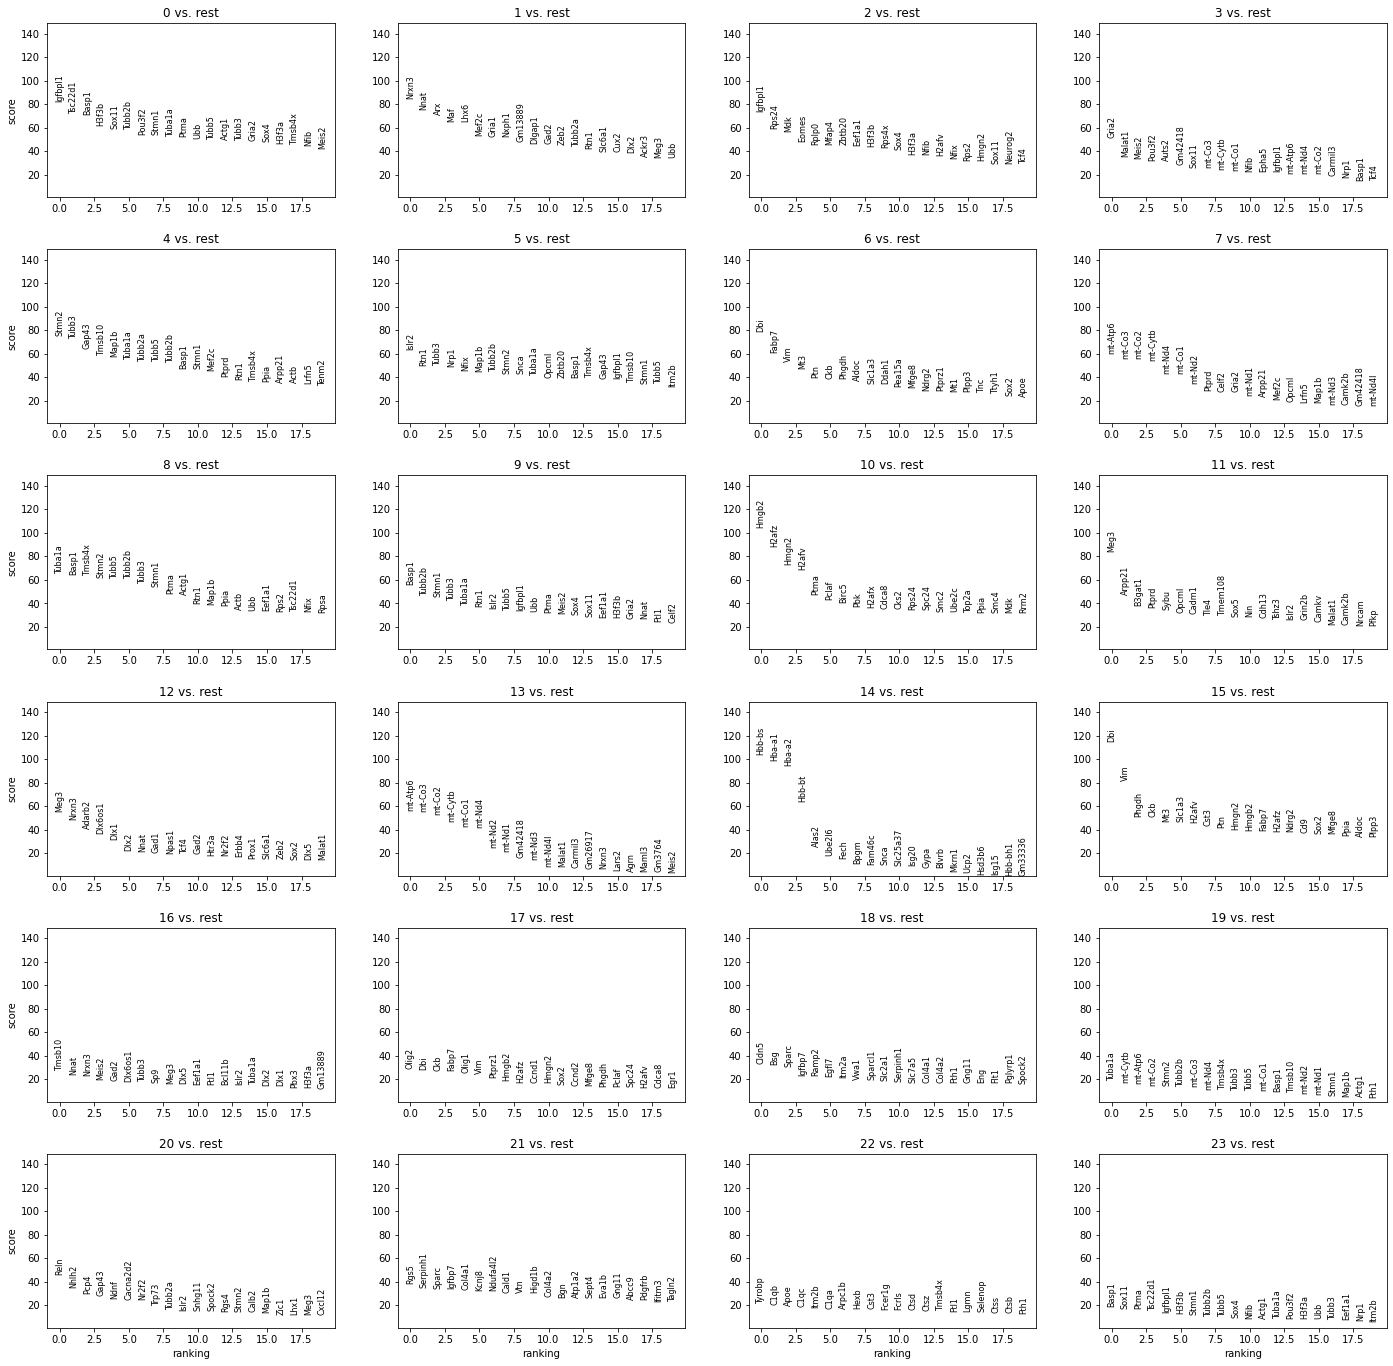

In [8]:
sc.tl.rank_genes_groups(adata, "leiden")
sc.pl.rank_genes_groups(adata)

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


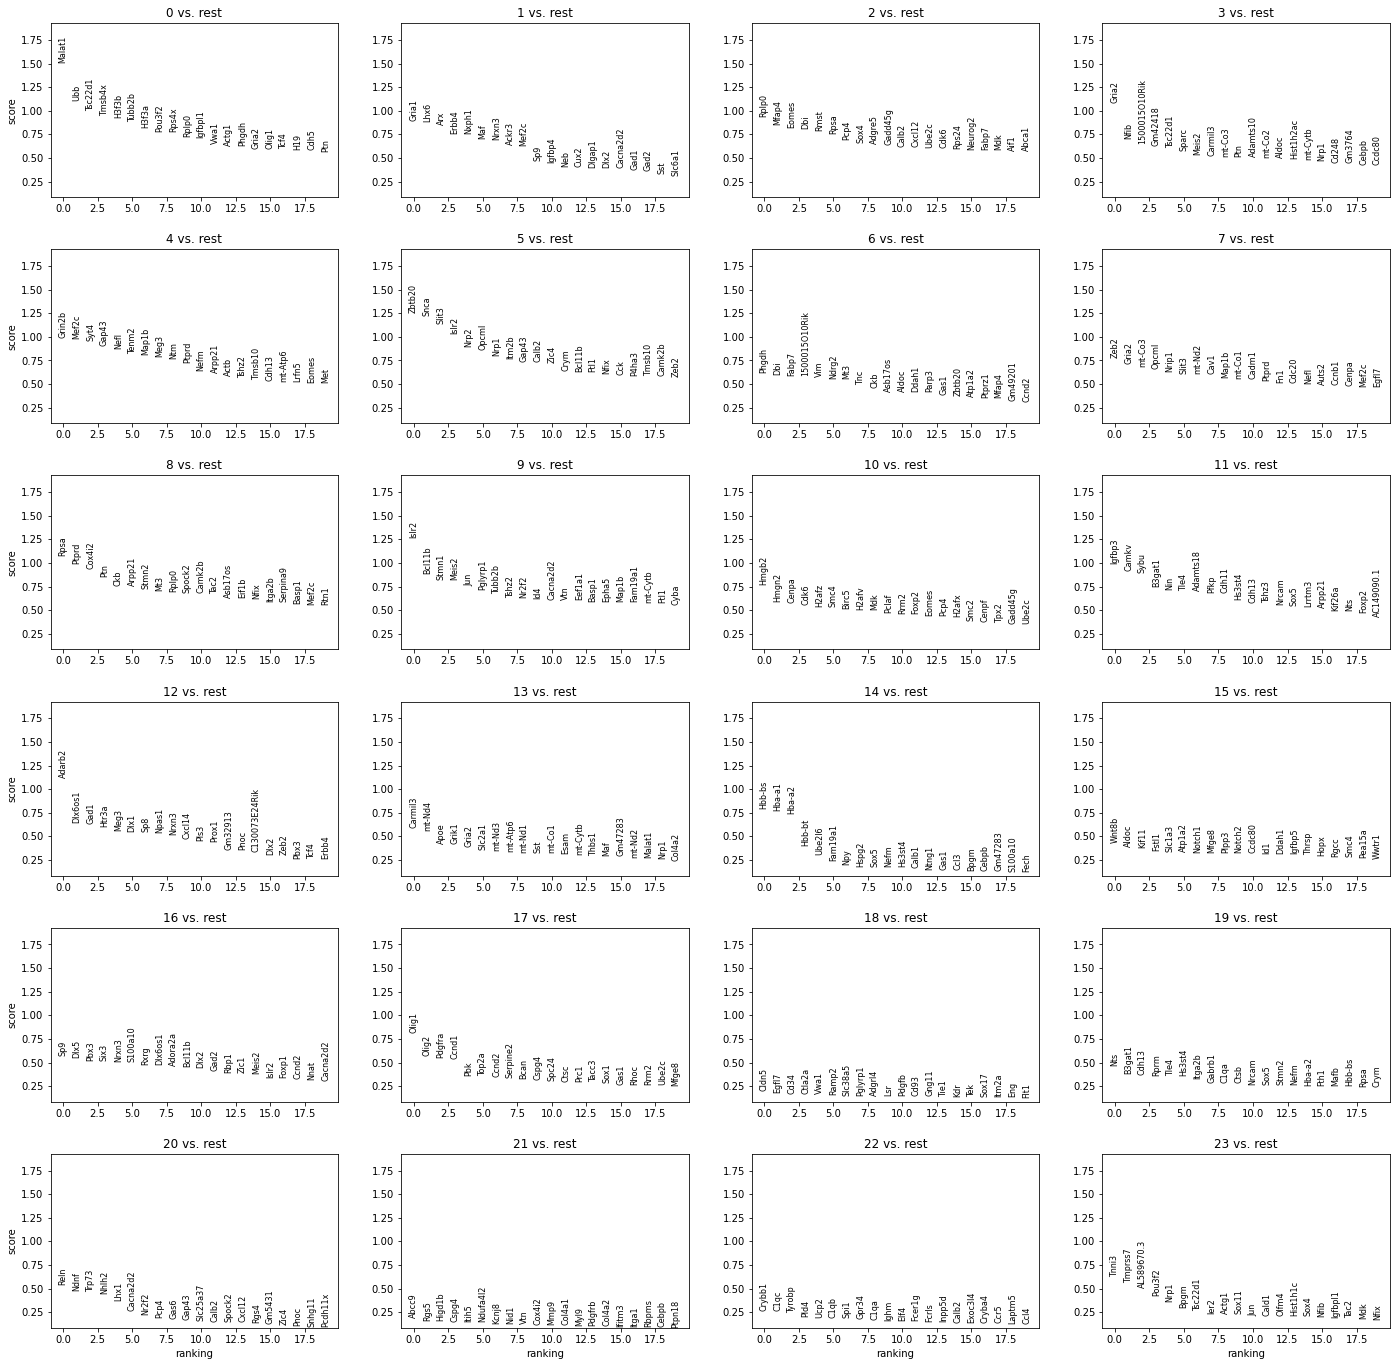

In [9]:
sc.tl.rank_genes_groups(adata, "leiden", method = 'logreg')
sc.pl.rank_genes_groups(adata)

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


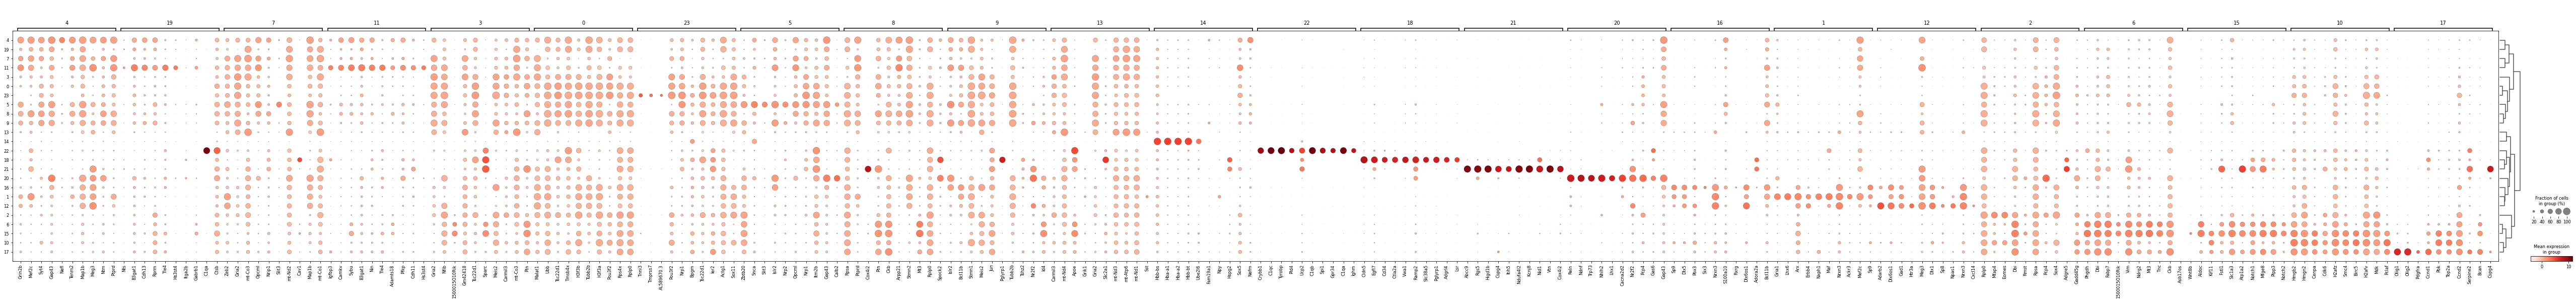

In [10]:
sc.pl.rank_genes_groups_dotplot(adata)

In [11]:
#sc.tl.umap(adata)
#sc.pl.umap(adata, color = ["Ndnf", "Hba-a1", "Olig2", "C1qa", "Aldh1l1", "Cox4i2", "Lhx6", "Tac2"])

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


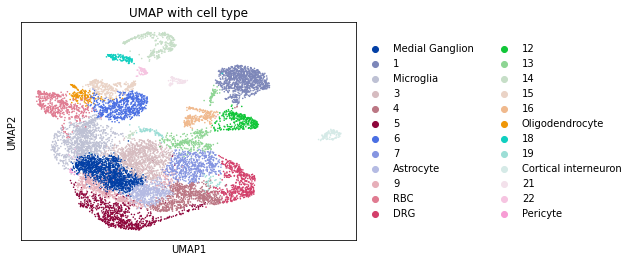

In [12]:
new_cluster_names = ['Medial Ganglion', '1','Microglia', '3','4', '5','6', '7', 'Astrocyte','9','RBC', 'DRG','12','13', '14','15','16', 'Oligodendrocyte','18','19',
'Cortical interneuron','21','22', 'Pericyte']
adata.rename_categories('leiden', new_cluster_names)
sc.tl.umap(adata)
sc.pl.umap(adata, color = 'leiden', title = 'UMAP with cell type')